Ερώτημα 1:

Παρακάτω βρίσκονται οι συναρτήσεις που μας ζητάει το πρώτο ερώτημα.

In [1]:
import cv2
import numpy as np
import sys
import glob

def loadImages(path):
    tags=[]
    images=[]

    for filename in glob.glob(path+'*.jpg'):
        #print(filename)
        tmp_img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
        tmp_img = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
        #print('Original Dimensions : ',tmp_img.shape)

        # resize image
        dim = (100, 100)
        img_resized = cv2.resize(tmp_img, dim, interpolation = cv2.INTER_AREA)
        #print('Resized Dimensions : ',img_resized.shape)
        #cv2.imshow("Resized image", img_resized)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        
        # reshape array
        images.append(np.asarray(img_resized).reshape((30000)))

        # extract labels
        filename=filename.replace(path,'')
        if filename[0] == 'F' :
            tags.append(0)
        elif filename[0] == 'S' :
            tags.append(1)
        elif filename[0] == 'W' :
            tags.append(2)
        else :
            sys.exit("wrong image name!")
        
    return (np.array(images,dtype='uint8'),np.array(tags,dtype='uint8'))


In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def PCA_ImageSpaceVisualization(X): 
    # pca
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    
    # reconstruct images
    reconstructed_images = X.reshape((30,100,100,3))
    
    # plot images
    plt.rcParams['figure.figsize'] = [27, 6]
    fig, ax = plt.subplots()
    plt.scatter(principalComponents[:, 0], principalComponents[:, 1])
    for im, pc in zip(reconstructed_images, principalComponents):
        ab = AnnotationBbox(OffsetImage(im), pc)
        ax.add_artist(ab)
    plt.show() 

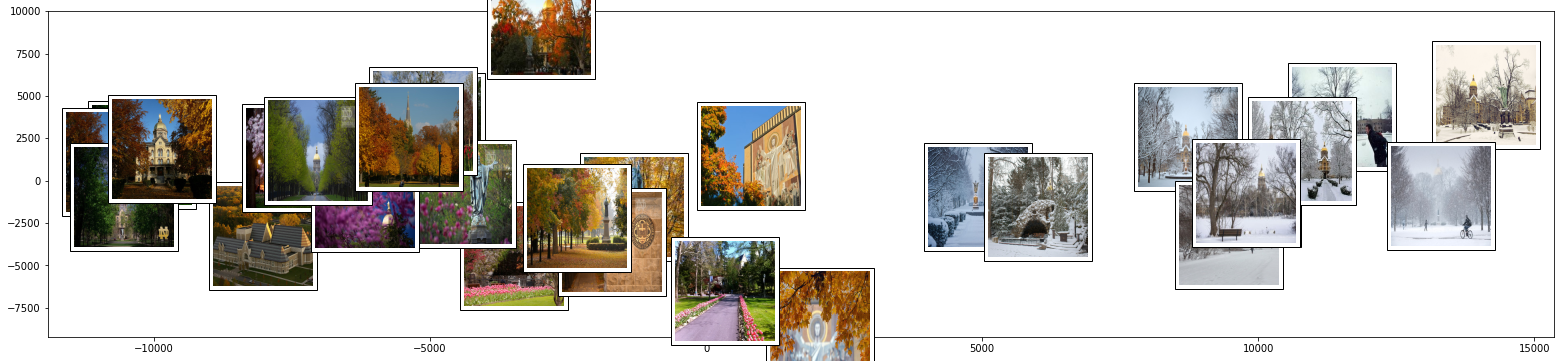

In [3]:
data, labels=loadImages('/home/stratos/Desktop/images/')
PCA_ImageSpaceVisualization(data)

2.1 Τι σημαίνει όταν εικόνες βρίσκονται κοντά σε αυτό το χώρο δύο διαστάσεων που
απεικονίζεται στο παραπάνω plot; Τι σημαίνει όταν εικόνες απέχουν πολύ; Μπορούμε να
γενικεύσουμε αυτά τα συμπεράσματα για τον αρχικό χώρο των εικόνων ο οποίος είναι πολύ
μεγάλης διάστασης;

Γενικά όταν οι εικόνες βρίσκονται κοντά σημαίνει οτι είναι παρόμοιες και όταν είναι μακρυά σημαίνει οτι δεν μοιάζουν και τόσο. Συγκεκριμένα σε αυτή την περίπτωση για αν δούμε αν γενικεύουν καλά αυτά τα αποτελέσματα σε περισσότερες διαστάσεις θα πρέπει να δούμε το ποσοστό διακύμανσης που πετυχαίνουμε παίρνοντας 2 μόνο συνιστώσες.

In [4]:
# pca
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(data)

print(pca.explained_variance_ratio_.cumsum())

[0.47772869 0.57199141 0.63153578 0.67952316 0.7178485  0.75027106
 0.77719119 0.80115862 0.82043021 0.83784229 0.85442222 0.86946395
 0.88256898 0.89434066 0.90561305 0.91585303 0.92554366 0.93483269
 0.94377935 0.95197108 0.95980858 0.96689875 0.97369412 0.98018565
 0.9865812  0.9912902  0.99583496 0.99996922 1.         1.        ]


Παραπάνω βλέπουμε το ποσοστό διακύμανσης που πετυχαίνουμε παίρνοντας χ συνιστώσες. Παρατηρούμε οτι με 2 συνιστώσες έχουμε 0.57199141%. Συνήθως στοχεύουμε για 95+%. Στην συγκεκριμένη περίπτωση για 20+ συνιστώσες.

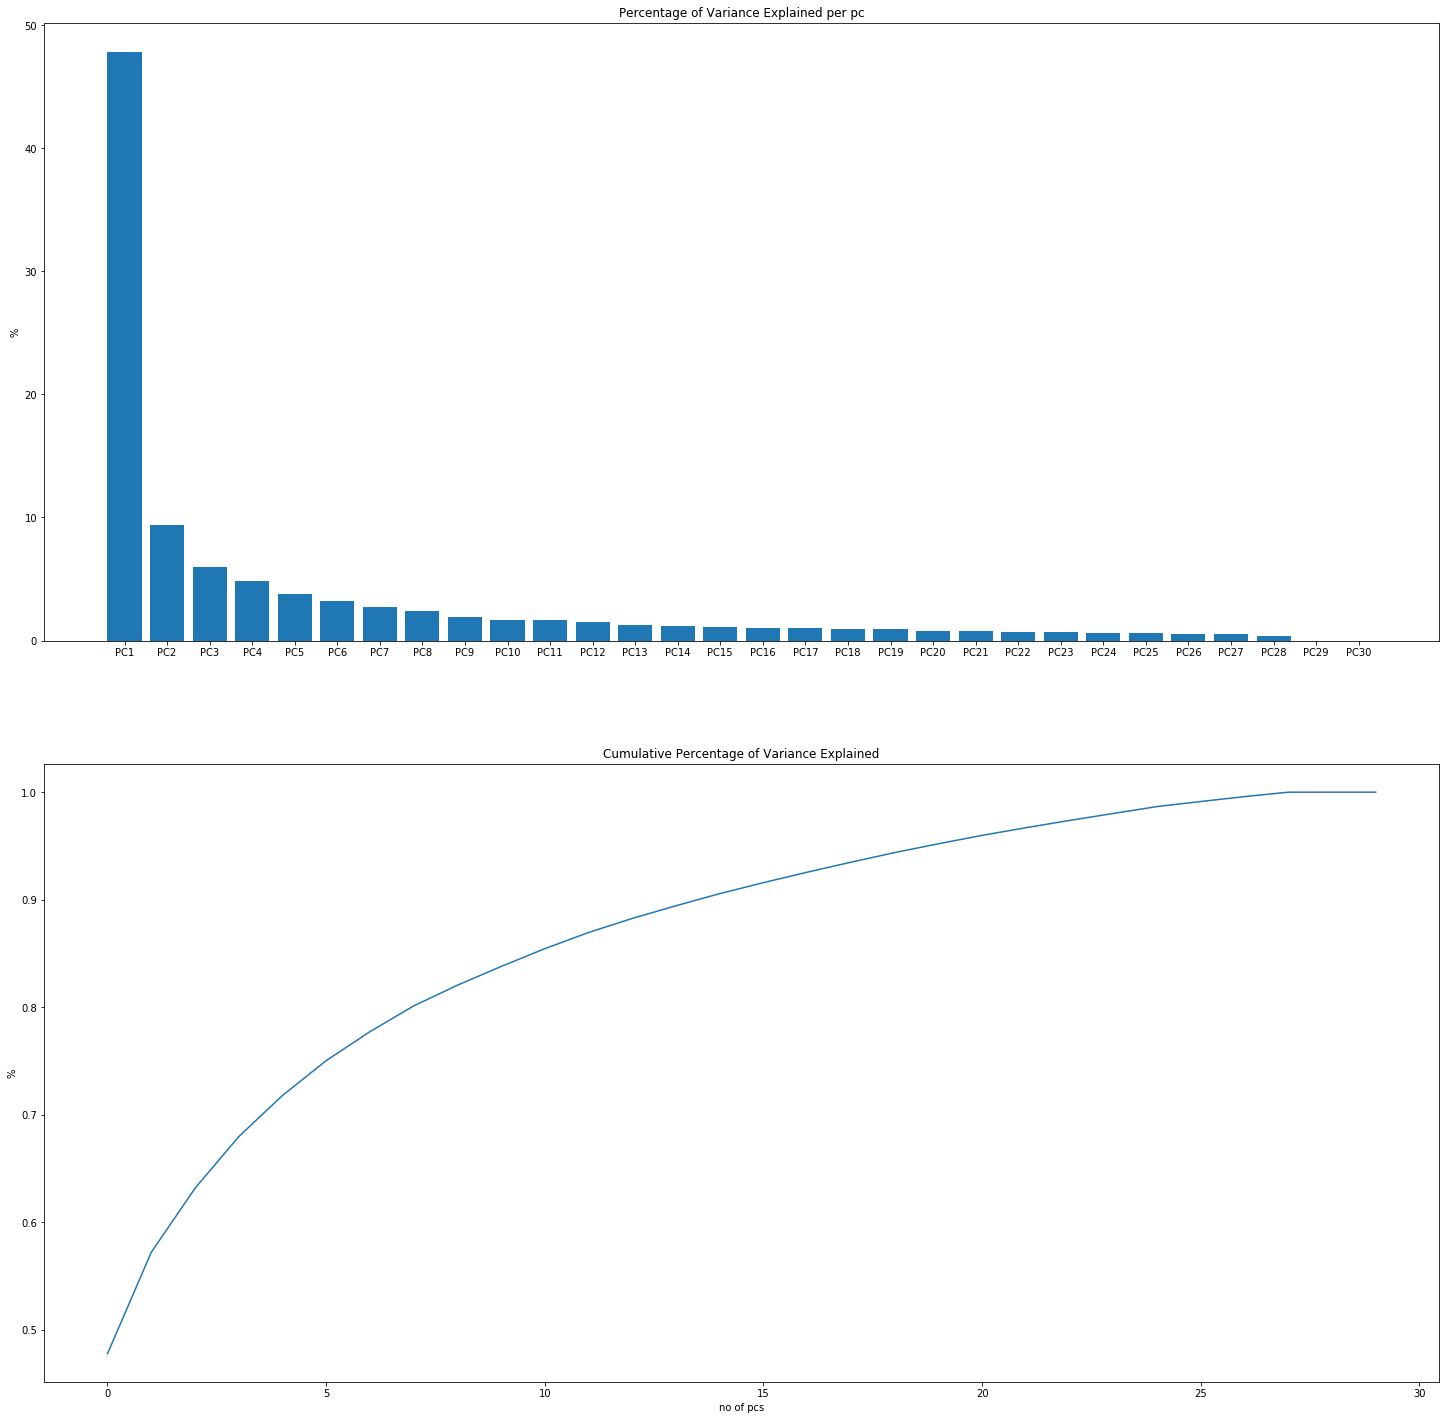

In [5]:
# Percentage of Variance graph
# https://www.youtube.com/watch?v=Lsue2gEM9D0
plt.rcParams['figure.figsize'] = [25, 25]
plt.subplot(2, 1, 1)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
xtags = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=xtags)
plt.title('Percentage of Variance Explained per pc')
plt.ylabel('%')

plt.subplot(2, 1, 2)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative Percentage of Variance Explained')
plt.ylabel('%')
plt.xlabel('no of pcs')
plt.show()

Στο παραπάνω διάγραμμα φαίνεται το ποσοστό διακύμανσης που προσφέρει κάθε συνιστώσα. Η καμπύλη δείχνει τον προηγούμενο πίνακα.

Άρα βλέπουμε οτι παίρνοντας μόνο 2 συνιστώσες, τα αποτελέσματα μας δεν γενικεύουν πολύ καλά σε περισσότερες διαστάσεις, γιατί εξηγούν μόνο το ~57%. Αυτό που είναι σίγουρο είναι οτι όσες συνιστώσες και να προσθέσουμε εφόσον θα έχουμε και τις 2 πρώτες θα υπάρχει κάποια απόσταση μεταξύ των άσπρων και των υπόλοιπον εικόνων (summer + fall vs winter ) (αυτή η απόστασή δεν θα είναι ίδια σε μέγεθος γιατί θα προσθέτουν πολλές διαστάσεις ακόμα). Επίσης, αυτό που παρατηρούμε είναι οτι το καλοκαίρι και το φθινόπωρο είναι λίγο "μπερδεμένα".

29 principals (99.99999999999999%)


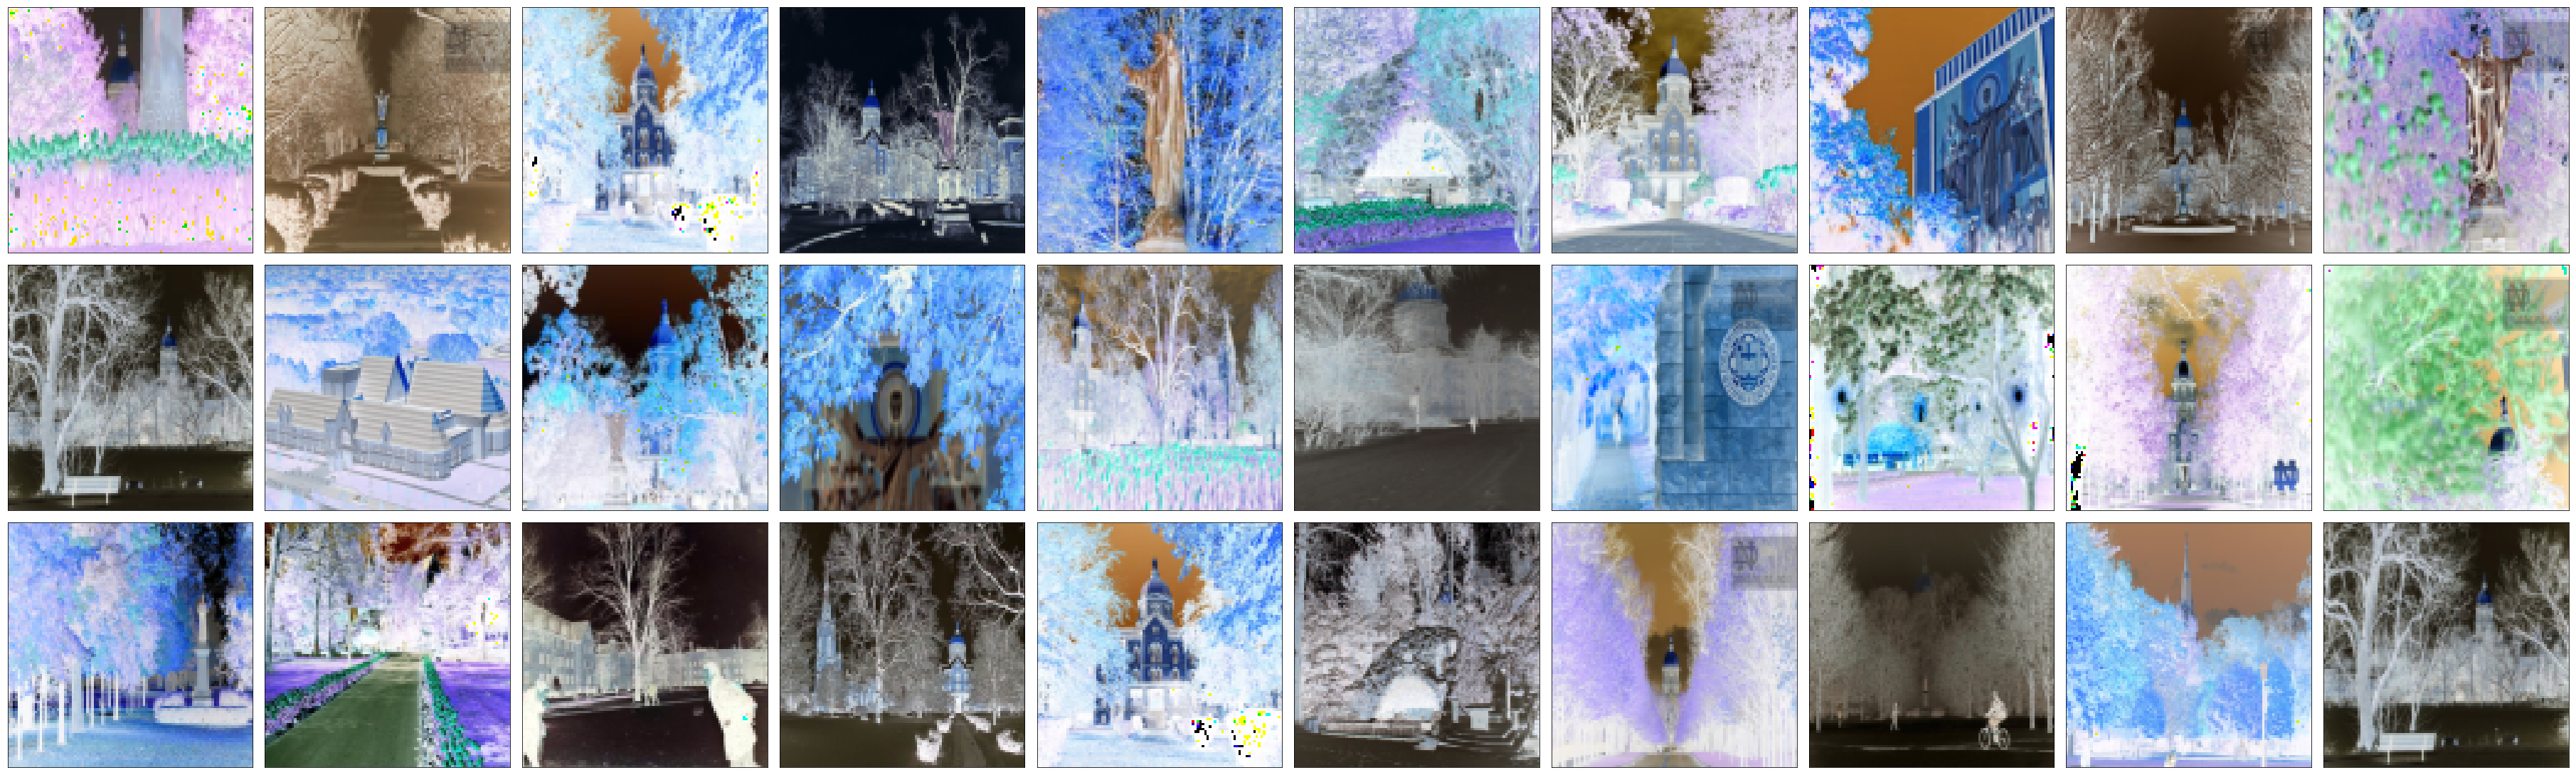

In [6]:
# pca
pca = PCA(n_components=29)
principalComponents = pca.fit_transform(data)

print(str(len(pca.explained_variance_ratio_))+" principals ("+str(pca.explained_variance_ratio_.cumsum()[-1]*100)+"%)")

# reconstruct images
reconstructed_images = pca.inverse_transform(principalComponents)

fig = plt.figure(figsize=(50,50)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 64 by 64 pixels 
for i in range(30): 
    ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(reconstructed_images[i]*255, (100,100,3)).astype(np.uint8), cmap=plt.cm.bone, interpolation='nearest')

2.2 Οι εικόνες που αντιστοιχούν σε μία από τις εποχές τείνουν να ομαδοποιούνται πιο κοντά
από ότι οι υπόλοιπες; Γιατί συμβαίνει αυτό;

Η μεγαλύτερη διαφορά στις συγκεκριμένες εικόνες παρατηρούμε οτι είναι το χρώμα. Οι εικόνες με πιο ανοιχτό χρώμα (άσπρο) είναι πολύ διαφορετικές από τις υπόλοιπες. Παρατηρούμε από το διάγραμμα ότι όσο πιο ανοιχτό το χρώμα της εικόνας, τόσο πιο δεξιά εμφανίζεται. Η PC1 είναι υπεύθυνη για τις αποστάσεις στον άξονα χ και για ~50% της διακύμανσης. Άρα καταλαβαίνουμε οτι πιθανότατα η PC1 μετράει την φωτεινότητα η κάτι παρόμοιο.

Αυτή η παρατήρησή μας επιβεβαιώνεται και από τις παραπάνω εικόνες. Παραπάνω αλλάζοντας τα n_components βλέπουμε πως φαίνονται οι reconstructed εικόνες. πχ για 27 pcs το ανθρώπινο μάτι δεν καταλαβαίνει καμία διαφορά. Για 28 όμως, αρχίζουμε να αναγνωρίζουμε τις εικόνες, μπορούμε μέχρι και να καταλάβουμε ποιες ανήκουν στον χειμώνα, οι πιο σκούρες. Βλέπουμε οτι o outlier του χειμώνα είναι σκούρα εικόνα σε σχέση με τις άλλες εποχές αλλά οχι τελείως μαύρη, όπως οι υπόλοιπες εικόνες του χειμώνα (είναι η καφέ εικόνα 3,7). Επίσης εύκολα μπορούμε να βρούμε την πιο αριστερή (2,10) και την πιο δεξιά εικόνα (1,4). (απο υπολογιστή σε υπολογιστή η διάταξη των εικόνων, στο παραπάνω γράφημα, μπορεί να αλλάξει οπότε οι προηγούμενες συντεταγμένες να μην είναι σωστές) (οι εικόνες αυτές δεν αντιπροσωπεύουν ακριβώς τις τιμές της pca γτ κάνω *255 για να τις πάω στο διάστημα 0-255 και να έχουν νόημα σαν τιμές pixel)

3.1 Να ορίσετε μαθηματικά το μέτρο της ακρίβειας ταξινόμησης (classification accuracy).

πηγή: https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

Το classification accuracy που μετράμε στα συγκεκριμένα τεστ με το όρισμα scoring='accuracy' είναι το πλοίθος των σωστών κατηγοριοποιήσεων δια το πλίθος των τεστ. Δηλαδή: $\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$. Προφανώς το y και το $\hat{y}$ ξεκινάνε απο το 0 και έχουν πλίθος $n_{samples}$ και y είναι οι προβλέψεις ενώ $\hat{y}$ είναι οι τα σωστά-πραγματικά labels. Το $\hat{y}_i = y_i$ είναι 1 όταν η πρόβλεψη συμπίπτει με την σωστή τιμή, αλλιώς είναι 0.

3.2 Χρησιμοποιείστε 5-fold cross validation και αναφέρετε τη μέση ακρίβεια ταξινόμησης
για τους δύο ταξινομητές τόσο για τα δεδομένα μεγάλης διάστασης όσο και για τα
χαρακτηριστικά χαμηλής διάστασης.

Παρακάτω εμφανίζονται τα αποτελέσματα που ζητάει η εκφώνηση και κάποια παραπάνω για να κρίνουμε πιο σωστά τα ερωτήματα 3.3 και 3.4 (πολλά επαναλαμβάνονται πχ σε κάθε επανάληψη τρέχουν ξανά οι knn, svm χωρίς pca). Σημειώνω οτι σε κάποια από τα παρακάτω τεστ κάνω scaling. Δεν κάναμε scaling στο προηγούμενο ερώτημα γιατί έπρεπε να ανακατασκευάσουμε τις εικόνες και αν κάναμε scaling οι τιμές των pixel δεν θα είχαν πια νόημα.

chose 2/30000 components with 1 neighbors
	knn: 0.7666666666666666
	pca+knn: 0.6666666666666666
	svm: 0.7333333333333333
	pca+svm: 0.5666666666666667
-----------------------------------------------
chose 2/30000 components with 1 neighbors and scaling
	knn: 0.7333333333333333
	pca+knn: 0.7
	svm: 0.6666666666666666
	pca+svm: 0.6333333333333333
-----------------------------------------------
chose 15/30000 components (90.0%) with 1 neighbors
	knn: 0.7666666666666666
	pca+knn: 0.6666666666666667
	svm: 0.7333333333333333
	pca+svm: 0.6666666666666667
-----------------------------------------------
chose 15/30000 components (90.0%) with 1 neighbors and scaling
	knn: 0.7333333333333333
	pca+knn: 0.6666666666666667
	svm: 0.6666666666666666
	pca+svm: 0.7333333333333334
-----------------------------------------------
chose 26/30000 components (99.0%) with 1 neighbors
	knn: 0.7666666666666666
	pca+knn: 0.8
	svm: 0.7333333333333333
	pca+svm: 0.8
-----------------------------------------------
chos

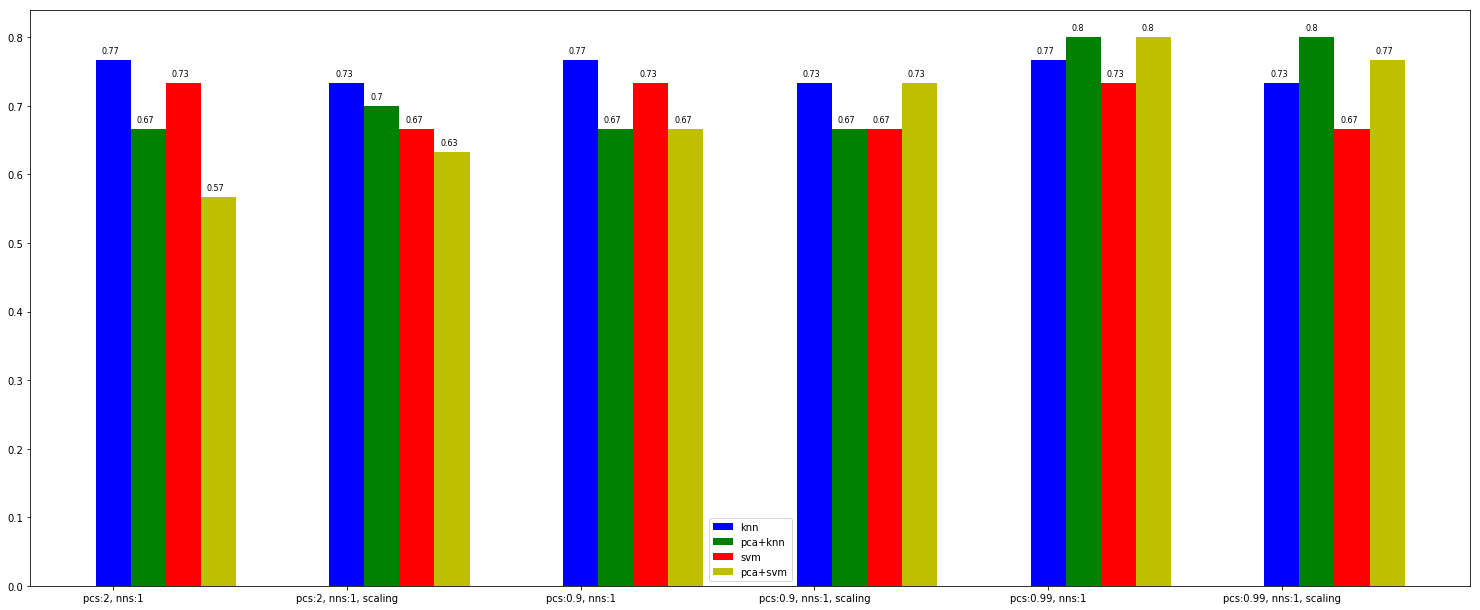

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler

# options = [ (0,2,1), (0,2,9), (1,2,1), (1,2,9), (0,0.90,1), (0,0.90,9), (1,0.90,1), (1,0.90,9), (0,0.99,1), (0,0.99,9), (1,0.99,1), (1,0.99,9)]
options = [ (0,2,1), (1,2,1), (0,0.90,1), (1,0.90,1), (0,0.99,1), (1,0.99,1)]

plt.rcParams['figure.figsize'] = [20, 8]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticklabels(["pcs:"+str(x[1])+", nns:"+str(x[2])+str(", scaling" if x[0] else "") for x in options])
ax.set_xticks(np.arange(len(options)))

# classifiers
knn = KNeighborsClassifier(n_neighbors=1)
svm = LinearSVC(dual=False)

for i, (scale, components_par, nns) in enumerate(options):
    data_tmp = data
    
    # knn = KNeighborsClassifier(n_neighbors=nns)
    
    # scale
    if scale == 1:
        scaler = MinMaxScaler()
        data_tmp = scaler.fit_transform(data_tmp)
    
    # pca
    pca = PCA(n_components=components_par)
    principalComponents = pca.fit_transform(data_tmp)
    
    print("chose "+str(principalComponents.shape[1])+"/30000 components"+str(" ("+str(components_par*100)+"%)" if isinstance(components_par, float) else "")+" with "+str(nns)+" neighbors"+str(" and scaling" if scale else ""))

    # knn
    knn.fit(data_tmp, labels)
    scores_knn = np.mean(cross_val_score(knn, data_tmp, labels, scoring='accuracy', cv=5))
    print("\tknn: "+str(np.mean(scores_knn)))
    ax.bar(i + 0.00, scores_knn, color = 'b', width = 0.15, label='knn')
    ax.text(i + 0.00-0.05, scores_knn+0.01,  round(scores_knn, 2), fontsize=8)
    
    # pca knn 
    knn.fit(principalComponents, labels)
    scores_pca_knn = np.mean(cross_val_score(knn, principalComponents, labels, scoring='accuracy', cv=5))
    print("\tpca+knn: "+str(np.mean(scores_pca_knn)))
    ax.bar(i + 0.15, scores_pca_knn, color = 'g', width = 0.15, label='pca+knn')
    ax.text(i + 0.15-0.05, scores_pca_knn+0.01,  round(scores_pca_knn, 2), fontsize=8)

    # svm
    svm.fit(data_tmp, labels)
    scores_svm = np.mean(cross_val_score(svm, data_tmp, labels, scoring='accuracy', cv=5))
    print("\tsvm: "+str(np.mean(scores_svm)))
    ax.bar(i + 0.30, scores_svm, color = 'r', width = 0.15, label='svm')
    ax.text(i + 0.30-0.05, scores_svm+0.01,  round(scores_svm, 2), fontsize=8)

    # pca svm
    svm.fit(principalComponents, labels)
    scores_pca_svm = np.mean(cross_val_score(svm, principalComponents, labels, scoring='accuracy', cv=5))
    print("\tpca+svm: "+str(np.mean(scores_pca_svm)))
    ax.bar(i + 0.45, scores_pca_svm, color = 'y', width = 0.15, label='pca+svm')
    ax.text(i + 0.45-0.05, scores_pca_svm+0.01,  round(scores_pca_svm, 2), fontsize=8)
    
    print("-----------------------------------------------")
    
# for unique legend
# https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend
ax.legend()
handles, tags = plt.gca().get_legend_handles_labels()
by_label = dict(zip(tags, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

Όπως βλέπουμε παραπάνω παρακολουθούμε την μέση ακρίβεια των αλγορίθμων knn και linear svc. Για να απαντήσω πιο σωστά στα επόμενα ερωτήματα έχω τρέξει συνδυασμούς των παραπάνω αλγορίθμων. Συγκεκριμένα έχω τις παρακάτω παραμέτρους: 
* 1 ή 9 γείτονες στον knn (αυτή η παράμετρος δεν είναι ενεργοποιημένη, είναι στο options που βρίσκεται σε σχόλια)
* με ή χωρίς min-max scaling πριν το pca
* ~0.57%, 90%, 99% ποσοστό διακύμανσης στο pca

Στο διάγραμμα φαίνονται τα αποτελέσματα για κάθε συνδυασμό αυτών των παραμέτρων (πολλά επαναλαμβάνονται).

3.3 Πώς θα προσδιορίσετε τη διάσταση των χαρακτηριστικών που θα εξάγεται μέσω της
PCA;

Συνήθως αυτό που θέλουμε είναι οι συνιστώσες του pca να έχουν 95+% διακύμανση. Τα τεστ με ~0.57% και 90% έγιναν για να παρατηρήσω την συμπεριφορά των αλγορίθμων για ναι δικαιολογήσω καλύτερα το 3.4. Στα παραπάνω παραδείγματα 2 pcs δεν είναι αρκετά γιατί έχουν ~0.57%. Παρακάτω βλέπουμε πως συμπεριφέρονται οι αλγόριθμοι με και χωρίς scaling στην επιλογή διαφορετικών pc.

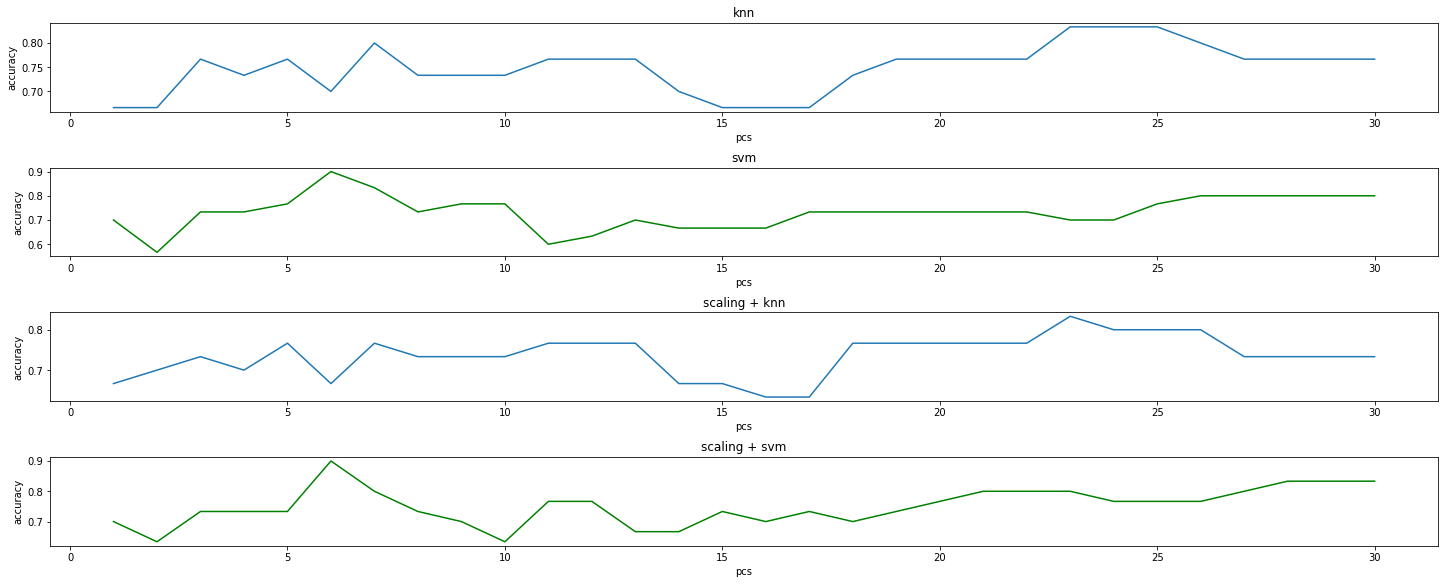

In [8]:
#-------------------------------------------- no scaling
# classifiers
knn = KNeighborsClassifier(n_neighbors=1)
svm = LinearSVC(dual=False, max_iter=10000)

accuracies_knn = []
accuracies_svm = []
for components_par in range(1,31):    
    # pca
    pca = PCA(n_components=components_par)
    principalComponents = pca.fit_transform(data)

    # knn
    knn.fit(data_tmp, labels)
    scores_knn = np.mean(cross_val_score(knn, principalComponents, labels, scoring='accuracy', cv=5))
    accuracies_knn.append(scores_knn)
    
    # svm
    svm.fit(data_tmp, labels)
    scores_svm = np.mean(cross_val_score(svm, principalComponents, labels, scoring='accuracy', cv=5))
    accuracies_svm.append(scores_svm)

# knn
knn.fit(data, labels)
scores_knn = np.mean(cross_val_score(knn, principalComponents, labels, scoring='accuracy', cv=5))
accuracies_knn.append(scores_knn)

# svm
svm.fit(data, labels)
scores_svm = np.mean(cross_val_score(svm, principalComponents, labels, scoring='accuracy', cv=5))
accuracies_svm.append(scores_svm)
    
fig, axs = plt.subplots(4, constrained_layout=True)
plt.rcParams['figure.figsize'] = [20, 8]
axs[0].set_title('knn')
axs[0].set_xlabel('pcs')
axs[0].set_ylabel('accuracy')
axs[0].plot(range(1,31),accuracies_knn[:30])
axs[1].set_title('svm')
axs[1].set_xlabel('pcs')
axs[1].set_ylabel('accuracy')
axs[1].plot(range(1,31), accuracies_svm[:30], 'g-')

#-------------------------------------------- with scaling
# scale
scaler = MinMaxScaler()
data_tmp = scaler.fit_transform(data)

accuracies_knn_scale = []
accuracies_svm_scale = []
for components_par in range(1,31):    
    # pca
    pca = PCA(n_components=components_par)
    principalComponents = pca.fit_transform(data_tmp)

    # knn
    knn.fit(data_tmp, labels)
    scores_knn = np.mean(cross_val_score(knn, principalComponents, labels, scoring='accuracy', cv=5))
    accuracies_knn_scale.append(scores_knn)
    
    # svm
    svm.fit(data_tmp, labels)
    scores_svm = np.mean(cross_val_score(svm, principalComponents, labels, scoring='accuracy', cv=5))
    accuracies_svm_scale.append(scores_svm)
    
# knn
knn.fit(data_tmp, labels)
scores_knn = np.mean(cross_val_score(knn, principalComponents, labels, scoring='accuracy', cv=5))
accuracies_knn_scale.append(scores_knn)

# svm
svm.fit(data_tmp, labels)
scores_svm = np.mean(cross_val_score(svm, principalComponents, labels, scoring='accuracy', cv=5))
accuracies_svm_scale.append(scores_svm)
    
axs[2].set_title('scaling + knn')
axs[2].set_xlabel('pcs')
axs[2].set_ylabel('accuracy')
axs[2].plot(range(1,31),accuracies_knn_scale[:30])
axs[3].set_title('scaling + svm')
axs[3].set_xlabel('pcs')
axs[3].set_ylabel('accuracy')
axs[3].plot(range(1,31), accuracies_svm_scale[:30], 'g-')
plt.show()

Παρακάτω βλέπουμε την επίδραση του pca στο accuracy του knn και του scv.
Βλέπουμε οτι η γενική συμπεριφορά των αλγορίθμων (η γενική μορφή του διαγράμματος "ανεβάσματα-κατεβάσματα") δεν επηρεάζεται πολύ από το scaling. Παρατηρούμε οτι ο knn έχει καλύτερα αποτελέσματα ~90% για ~23-25 συνιστώσες και ο svc ~90% για 7 συνιστώσες. 

3.4 Ποιος ταξινομητής έχει τη καλύτερη επίδοση και γιατί;
Έχοντας στο μυαλό μας το προηγούμενο ερώτημα και τον τρόπο λειτουργίας των αλγορίθμων θα αναλύσω περιληπτικά παρακάτω την συμπεριφορά τους όσο αφορά την ταχύτητα και την μνήμη.
Ο svc χρειάζεται πολύ λιγότερα δεδομένα για να εκπαιδευτεί και στην μνήμη το μόνο που αποθηκεύεται και χρησιμοποιήτε για το testing είναι 3 ευθείες γραμμές (οχι 2 γιατί είναι linearSCV και οχι svm με παράμετρο kernel='linear'. Εξηγώ στο επόμενο ερώτημα). Ο  knn χρειάζεται περισσότερες διαστάσεις άρα και περισσότερα δεδομένα για εκπαίδευση και χρειάζεται και όλα αυτά τα δεδομένα στο testing. Τέλος, για τον knn ο χρόνος εκπαίδευσης είναι μηδενικός ενώ για τον svm οχι (πρέπει να συγκλίνει), ενώ ο χρόνος για μια κατηγοριοποίηση είναι μικρότερος στον svm (απλά πρέπει να αποφασίσει αν είναι δεξιά η αριστερά των γραμμών) αποτι στον knn (πρέπει να βρει τον κοντινότερο γείτονα). Πρακτικά, αν δεν μας ενδιέφερε ο χρόνος εκπαίδευσης, θα διαλέγαμε τον svc γιατί τελικά είναι πιο γρήγορος στις προβλέψεις και έχει πολύ μικρότερο μέγεθος στην μνήμη.

Απο τα τεστ παρατηρούμε οτι ο knn με έναν μόνο γείτονα έχει όριο το ~76%. Αυτό το αποτέλεσμα είναι ίδιο είτε για 2, 15 ή 30000 διαστάσεις. Στην βέλτιστη περίπτωση 23-26 διαστάσεις μπορεί να φτάσει μέχρι και ~90%. Θα μπορούσαμε να έχουμε καλύτερα αποτελέσματα αν αυξήσουμε τους γείτονες, τότε ίσος να πρέπει να χρησιμοποιήσουμε λιγότερες συνιστώσες για να μην πέσουμε στην "κατάρα της διασταλτικότητας".

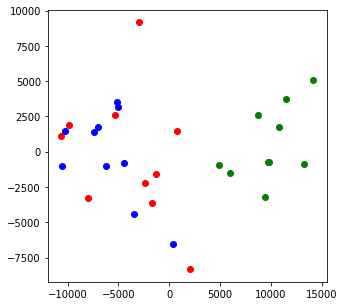

In [9]:
# pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)

# plot points
plt.rcParams['figure.figsize'] = [5, 5]
fig, ax = plt.subplots()
plt.scatter([x for x, t in zip(principalComponents[:, 0], labels) if t == 0 ], [x for x, t in zip(principalComponents[:, 1], labels) if t == 0 ], c='red')
plt.scatter([x for x, t in zip(principalComponents[:, 0], labels) if t == 1 ], [x for x, t in zip(principalComponents[:, 1], labels) if t == 1 ], c='blue')
plt.scatter([x for x, t in zip(principalComponents[:, 0], labels) if t == 2 ], [x for x, t in zip(principalComponents[:, 1], labels) if t == 2 ], c='green')
plt.show()

Αυτό είναι το διάγραμμα του 2.1 χωρίς τις εικόνες. Βλέπουμε οτι οι πράσινες εικόνες (του χειμώνα) μπορούνε εύκολα να διαχωριστούν με μια ευθεία. Οι υπόλοιπες όμως οχι, άρα το πρόβλημα δεν είναι σωστό να το θεωρήσουμε γραμμικό. Έτσι εφόσον ο linear svc είναι γραμμικός περιμένουμε οτι δεν θα έχει όσο καλά αποτελέσματα έχει ο knn που δεν είναι (δεν πρέπει να ξεχνάμε όμως οτι ο svm έχει και τον kernel, ο οποίος όμως είναι πάλι γραμμικός).

Τώρα θα δούμε περιληπτικά τι γίνεται και με scaling στον svc.
Εν ολίγοις, με scaling βλέπουμε οτι ο svc έχει τα καλύτερα αποτελέσματα. Παρακάτω εξηγώ περιληπτικά και διαισθητικά το γιατί.

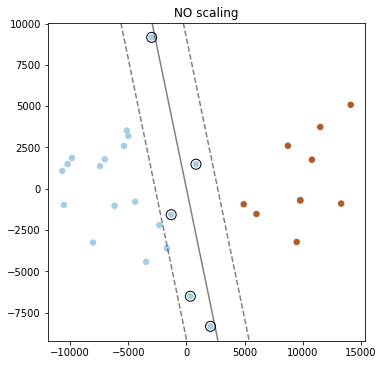

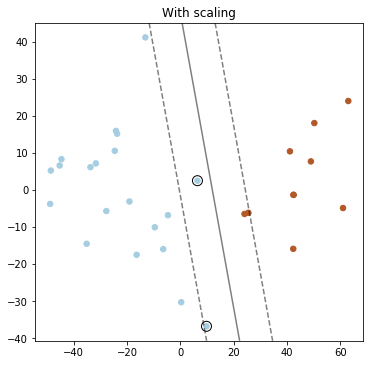

In [10]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html

#-------------------------------------------- NO scaling
# pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)

X = principalComponents
y = np.array([x if x != 1 else 0 for x in labels])

plt.figure(figsize=(10, 5))
clf = LinearSVC(dual=False).fit(X, y)
decision_function = clf.decision_function(X)
support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
support_vectors = X[support_vector_indices]

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
plt.tight_layout()
plt.title("NO scaling")
plt.show()

#-------------------------------------------- with scaling
# scale
scaler = MinMaxScaler()
data_tmp = scaler.fit_transform(data)

# pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_tmp)

X = principalComponents
y = np.array([x if x != 1 else 0 for x in labels])

plt.figure(figsize=(10, 5))
clf = LinearSVC(dual=False).fit(X, y)
decision_function = clf.decision_function(X)
support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
support_vectors = X[support_vector_indices]

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
plt.tight_layout()
plt.title("With scaling")
plt.show()


Ο linear svc για 3 κλάσεις, συνοπτικά, χωρίζει την μια κλάση εναντίων των 2 υπόλοιπων. Αυτό το κάνει για κάθε κλάση. Παραπάνω βλέπουμε τα support vectors για την κλάση χειμώνα εναντίων των υπόλοιπων κλάσεων. Παρατηρούμε οτι χωρίς scaling για παράδειγμα έχουμε ένα missclassification και στα support vectors βρίσκονται πολύ περισσότερες εικόνες απο "την μια κλάση" (καμία απο χειμώνα). Αυτή η παρατήρηση απο μόνη της δεν δικαιολογεί αυτή την πτώση στη ακρίβεια απλά είναι ένα παράδειγμα. Για να καταλάβουμε ακριβώς τι συμβαίνει πρέπει να σχεδιάσουμε και τα άλλα descision boundaries και support vectors (πχ καλοκαίρι εναντίων των υπόλοιπων) και να μελετήσουμε πιο βαθιά πως δουλεύει ο MinMaxScaler και ο LinearSVC. 

Ερώτημα 2:

Με την βοήθεια των παρακάτω συνδέσμων βρήκα τους τύπους του multiplicative update για το νεο πρόβλημα ελαχιστοποίησης.

http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=5185F45AE193F092F4520C7A782641D5?doi=10.1.1.120.1718&rep=rep1&type=pdf&fbclid=IwAR0J9QnpZeyjgC8_4GT1dJxuRX4neFxeT5gH3PxcBK0LOCRXR-i1In1iyi4

https://angms.science/doc/NMF/nmf_0.pdf?fbclid=IwAR0UwpWHninzr7F2QbDA3p0BuOsxOLkHaQnbeGuLJDM8GZY35vL3LoFJEVc

https://stats.stackexchange.com/questions/351359/deriving-multiplicative-update-rules-for-nmf

Οι νέοι τύποι είναι οι παρακάτω:

$W_{t+1}=W_t*\frac{XC^T-2λW_t}{W_tCC^t}$

$C_{t+1}=C_t*\frac{W^TX-2λC_t}{W_tWC^t}$

Παρακάτω είναι η συνάρτηση RegNMF που ζητάει το 2ο ερώτημα, με τις βοηθητικές get_error, update_c, update_w, όπως δείχτηκε στο εργαστήριο. (Παρακάτω οταν γίνεται update το C χρησιμοποιούμε το $W_{t+1}$ αλλά όπως είδαμε και στο εργαστήριο, πρακτικά αυτό δεν έχει μεγάλη διαφορά)

In [11]:
import numpy.linalg as LA

def get_error(X, W, C):
    error = LA.norm(X - np.dot(W, C))**2 / LA.norm(X)**2
    return error

def update_c(X, W, C, l):
    numerator = np.dot(W.T, X) - 2*l*C
    denominator = np.dot(W.T.dot(W), C)
    C *= numerator
    C /= denominator
    return C

def update_w(X, W, C, l):
    numerator = X.dot(C.T) - 2*l*W
    denominator = W.dot(C.dot(C.T)) 
    W *= numerator
    W /= denominator
    return W

def RegNMF(X, k, l, epsilon):
    X_dim, samples = X.shape
    W = np.random.random((X_dim, k))
    C = np.random.random((k, samples))
    while True:
        error_old =  get_error(X,W,C)
        update_w(X,W,C,l)
        update_c(X,W,C,l)
        error_new = get_error(X,W,C)
        if abs(error_old-error_new) < epsilon:
            break
    return W, C

Παρακάτω είναι μια μικρή παραλλαγή της συνάρτησης RegNMF που επιστρέφει μόνο τον αριθμό επαναλήψεων για να μελετήσουμε τις επαναλήψεις πριν την σύγκληση.

In [12]:
import itertools
    
def nmf(X, k, l, epsilon):
    X_dim, samples = X.shape
    W = np.random.random((X_dim, k))
    C = np.random.random((k, samples))
    iters=0
    while True:
        iters += 1
        error_old =  get_error(X,W,C)
        update_w(X,W,C,l)
        update_c(X,W,C,l)
        error_new = get_error(X,W,C)
        if abs(error_old-error_new) < epsilon:
            break
    return iters

opts_k = [1,10,100]
opts_e = [0.1,0.01,0.001]
opts = list(itertools.product(opts_k, opts_e))

#create array with non negative floats <=100
X = np.random.rand(500,1000) * (100)
# np.random.seed(0) 
# Χ = np.random.random((500,1000))
for k, e in opts:
    print('k=',k," e=",e)
    i = nmf(X,k,0.1,e)
    print('iterations=',i)


k= 1  e= 0.1
iterations= 2
k= 1  e= 0.01
iterations= 2
k= 1  e= 0.001
iterations= 2
k= 10  e= 0.1
iterations= 2
k= 10  e= 0.01
iterations= 2
k= 10  e= 0.001
iterations= 3
k= 100  e= 0.1
iterations= 2
k= 100  e= 0.01
iterations= 2
k= 100  e= 0.001
iterations= 2


Παρακάτω τρέχω λίγα περισσότερα τεστ για να έχω μια πιο ολοκληρωμένη εικόνα και εμφανίζω σε ένα πίνακα τα αποτελέσματα. 

In [13]:
import pandas as pd
ranks=list()
epsilons=list()
iterations=list()
# run tests
for k in (1,10,100):
    for e in (0.1,0.01,0.001,0.0001,0.00001):
        i = nmf(X,k,0.1,e)
#         print(k,e,i)
        ranks.append(k)
        epsilons.append(e)
        iterations.append(i)

df = pd.DataFrame(list(zip(ranks,epsilons,iterations)),columns=['rank','epsilon','iterarions'])
df.style.hide_index()

rank,epsilon,iterarions
1,0.1,2
1,0.01,2
1,0.001,2
1,0.0001,2
1,1e-05,3
10,0.1,2
10,0.01,2
10,0.001,3
10,0.0001,44
10,1e-05,220


Όπως βλέπουμε οσο μικραίνει το ε τόσο πιο δύσκολα συγκλίνει ο αλγόριθμος. Αυτό είναι αναμενόμενο καθώς απαιτούμε μεγαλύτερη ακρίβεια. όσο μεγαλώνει το k τόσο πιο δύσκολα συγκλίνει ο αλγόριθμος. Για να καταλάβουμε γιατί συμβαίνει αυτό πρέπει να καταλάβουμε τι είναι το k. Οσο μεγαλύτερο το k τόσο πιο πολλές πληροφορίες μπορούμε να κρατήσουμε για την εικόνα (σαν να λέμε πιο πολλά pc στην pca). Αυτό φαίνεται αν παρατηρήσουμε το σφάλμα ανακατασκευής σε κάθε επανάληψη (οχι την διαφορά των error), όσο μεγαλύτερο το k τόσο πιο μικρό τελικό error έχουμε. Για παράδειγμα αν τρέξουμε Α: k=6, e=0.00001 και Β: k=120, e=0.0001 βλέπουμε οτι χρειάζονται περίπου 150 επαναλήψεις και στις 2 περιπτώσεις, αλλά στην δεύτερη περίπτωση το τελικό error είναι πολύ μικρότερο. Αυτό συμβαίνει γιατί όσο μεγάλη ακρίβεια δεκαδικού και να βάλουμε, (μέσα σε λογικά πλαίσια) πάντα θα έχουμε μικρότερο error αν απλά αυξήσουμε το k.

Παρακάτω θα δούμε την συμπεριφορά του αλγορίθμου για διαφορετικά λ.

In [14]:
import pandas as pd
ranks=list()
iterations=list()
# run tests
X = np.random.rand(500,1000) * (100)

for l in np.arange(0.0, 1.1, 0.1):
    i = nmf(X,100,l,0.00001)
    ranks.append(l)
    iterations.append(i)

for l in range(0,101,10):
    i = nmf(X,100,l,0.00001)
    ranks.append(l)
    iterations.append(i)
    
df = pd.DataFrame(list(zip(ranks,iterations)),columns=['lambda','iterarions'])
df.style.hide_index()

lambda,iterarions
0,459
0.1,449
0.2,457
0.3,453
0.4,460
0.5,451
0.6,457
0.7,456
0.8,471
0.9,455


Βλέπουμε οτι το λ δεν επηρεάζει πολύ τον αριθμό επαναλήψεων.

Παρακάτω βλέπουμε για τις εικόνες που παράγονται απο τα προηγούμενα τεστ. Οι στήλες είναι το k 0,10,100 αι οι σειρές το error 0.1,0.01,0.001,0.0001,0.00001. Tα περίεργα χρωματιστά πίξελ εμφανίζονται λόγο του .astype(np.uint8), γιατί ο πίνακας W έχει και δεκαδικές τιμές και γίνεται κάποια περίεργη μετατροπή σε ακέραιες (συμβαίνει και με τον sklearn.decomposition.NMF).

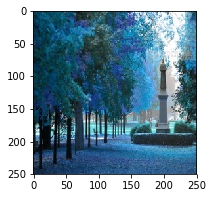

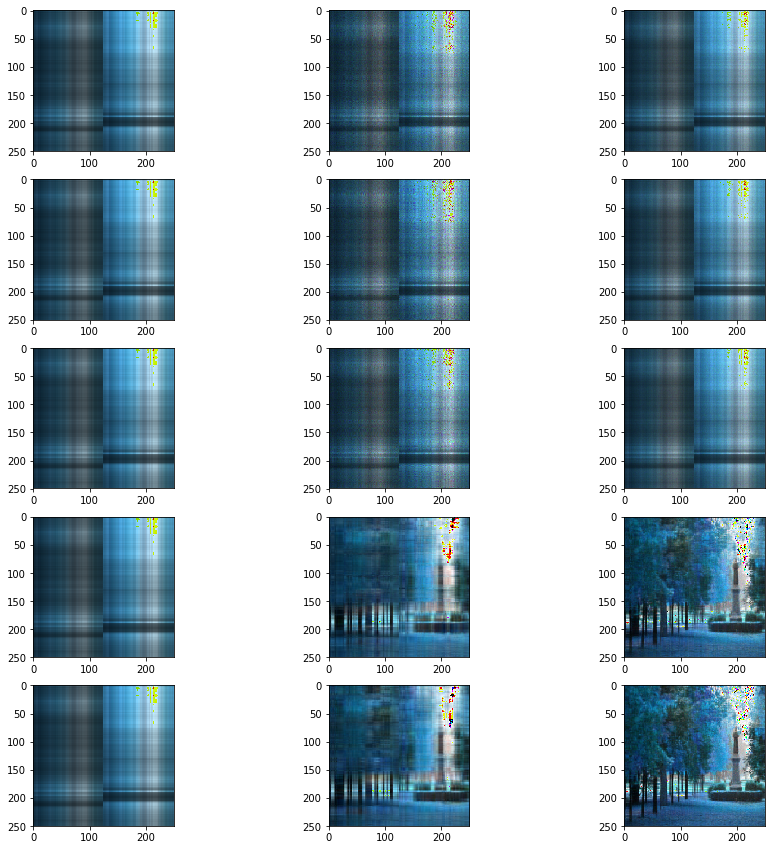

In [15]:
img = np.asarray(cv2.imread('/home/stratos/Desktop/images/F1.jpg'))
plt.figure(figsize=(3, 3))
plt.imshow(img, cmap=plt.cm.gray)

plt.figure(figsize=(15, 15))
for j, e in enumerate((0.1,0.01,0.001,0.0001,0.00001)):
    for i, k in  enumerate((1,10,100)):
        plt.subplot(5,3,j*3+i+1)
        W, C = RegNMF(img.reshape(500,375),k,0.1,e)
        new_img = (np.dot(W,C)).reshape(250,250,3).astype(np.uint8)
        plt.imshow(new_img, cmap=plt.cm.gray)
plt.show()

Όπως περιμέναμε, βλέπουμε οτι όσο μεγαλύτερο το k και το ε, τόσο περισσότερη πληροφορία κρατάμε απο την εικόνα.

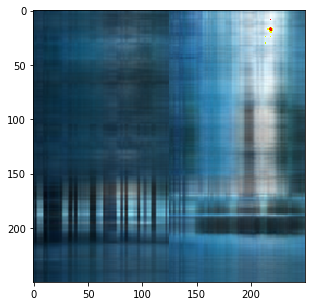

In [16]:
W, C = RegNMF(img.reshape(500,375),100,1000,0.00001)
new_img = (np.dot(W,C)).reshape(250,250,3).astype(np.uint8)
plt.imshow(new_img, cmap=plt.cm.gray)
plt.show()

Παραπάνω βλέπουμε την τελευταία εικόνα (κάτω δεξιά) από το προηγούμενο διάγραμμα αλλά με λ=1000. Παρατηρούμε οτι είναι πιο θολή, δηλαδή έχει κρατηθεί λιγότερη πληροφορία παρόλο που το k και ε είναι ίδια. Όσο πιο θολή είναι η εικόνα τόσο ποιο μεγάλο το σφάλμα ανακατασκευής. Αυτό είναι λογικό, καθώς στο σφάλμα ανακατασκευής δεν ενδιαφερόμαστε καθόλου για το λ.

Δεν έχει νοήμα να χρησιμοποιήσουμε cross validation γιατί θα χρησιμοποιήσουμε το σφάλμα ανακατασκευής για να μετρήσουμε την απόδοση του αλγορίθμου και όπως είπαμε πριν, το σφάλμα ανακατασκευής δεν λαμβάνει υπόψιν του το λ. Με άλλα λόγια Θα έχουμε καλύτερο σφάλμα ανακατασκευής αν λ=0. Το λ μετράει το regularization. Η μέθοδος που χρησιμοποιούμε λέγεται Tikhonov regularization με α=β. 